# SNAP Exploration of how $R_{EE}$ and Synaptic Dynamics affect fluctuation characteristics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from scipy.io import loadmat,savemat
from scipy.signal import deconvolve, savgol_filter



from plotnine import *
# import plotly

# import h5py
import os
os.environ['R_HOME'] = 'C:\\Users\\j_gav\\anaconda3\\envs\\analysis\\lib\\R'

from pymer4 import Lmer, Lm


from os import listdir




In [2]:
df = pd.read_csv('../fluxQuant/fluxquant.csv')
df

,Ree,Network,Ksyn,CV,ST,fexp,taus
0,1.0,1,0.0,1.771592,0.056322,-1.516639,0.662532
1,1.0,1,0.1,1.916009,0.110184,-1.590358,71.925501
2,1.0,1,0.2,1.959004,0.091148,-1.566909,26.752396
3,1.0,1,0.3,2.019925,0.038483,-1.495061,155.362781
4,1.0,1,0.4,2.083849,0.109364,-1.606667,43.836837
...,...,...,...,...,...,...,...
15295,6.0,50,0.1,0.443308,-0.008023,-1.374627,NaN
15296,6.0,50,0.2,0.590025,0.054901,-1.370695,NaN
15297,6.0,50,0.3,0.602127,-0.009796,-1.335001,NaN
15298,6.0,50,0.4,0.556926,-0.027210,-1.333052,NaN


In [45]:
len(df.Ree.unique())

51

In [48]:
len(df.Network.unique())

50

In [47]:
len(df.Ksyn.unique())

6

In [10]:
df['taunan'] = np.isnan(df.taus.values).astype('int')

In [22]:
print(np.sum(df.taunan.values))
print(np.sum(df[df.Ree.between(4,7)].taunan.values))

# model = Lmer('taunan ~ Ree + Ksyn + (1|Network)', data = df,family='binomial')

# print(model.fit())

3675
1913


C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV.svg


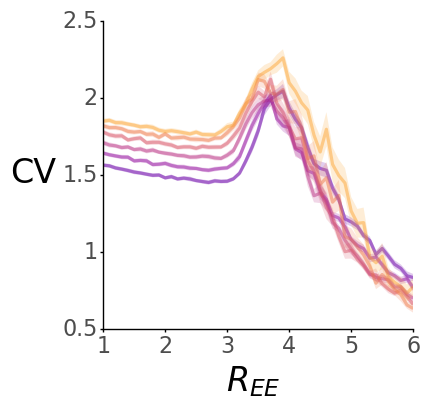

<ggplot: (96596669736)>

In [3]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

# colors=[np.array([0.4549,    0.6784,    0.8196]),
#     np.array([0.6706,    0.8510,    0.9137]),
#     np.array([0.8784,    0.9529,    0.9725]),
#     np.array([0.9961,    0.8784,    0.5647]),
#     np.array([0.9922,    0.6824,    0.3804]),
#     np.array([0.9569,    0.4275,    0.2627])]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)


p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,3,0.5),limits=(0.5,2.5),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(#legend_position=(0.35,0.8),
       legend_position = 'none',
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/CV.png')
p.save('../figures/fluctuations/CV.svg')

p

In [4]:
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]
colors = np.array(colors)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
print(colors[:,:-1])

[[0.4176 0.0006 0.6584]
 [0.5897 0.0729 0.6304]
 [0.7360 0.2094 0.5279]
 [0.8501 0.3470 0.4172]
 [0.9380 0.4927 0.3126]
 [0.9883 0.6523 0.2114]]


C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV_0_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV_0_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows cont

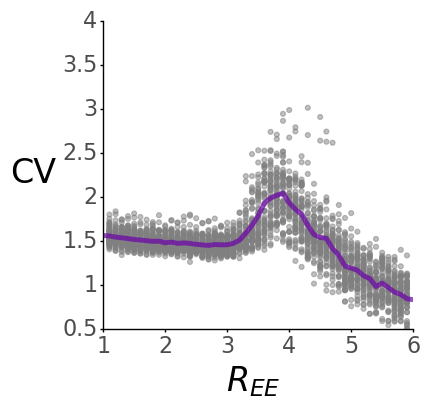

<ggplot: (97582796788)>

In [36]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)
    
df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan

p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high')) +
      geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+

#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +
       geom_line(alpha=0.7,size=2,color=colors[0]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,5,0.5),limits=(0.5,4),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/CV_0_indiv.png')
p.save('../figures/fluctuations/CV_0_indiv.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV_5_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 29 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/CV_5_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 29 rows co

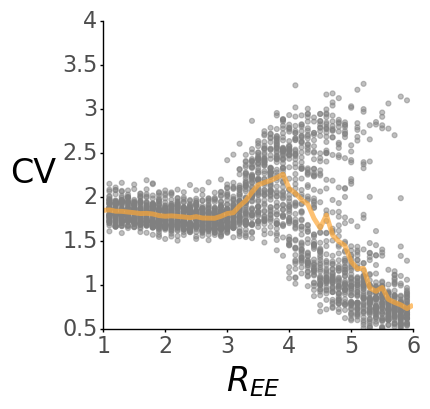

<ggplot: (97582656178)>

In [35]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['CV']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.CV.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.CV.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)
    
df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan

p=(ggplot(df_temp,aes(x='Ree',y='CV', ymin = 'ci_low',ymax = 'ci_high')) +
      geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +

    geom_line(alpha=0.7,size=2,color=colors[-1]) + 
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
     scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='CV',breaks=np.arange(0.5,5,0.5),limits=(0.5,4),expand = (0.0,0.0)) +
    scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
          axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/CV_5_indiv.png')
p.save('../figures/fluctuations/CV_5_indiv.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST.svg


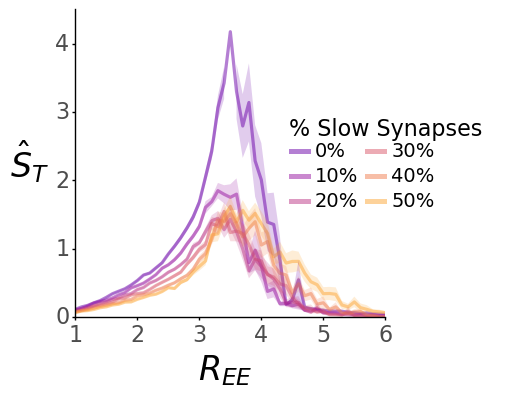

<ggplot: (96587036100)>

In [7]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]
# colors=[np.array([0.4549,    0.6784,    0.8196]),
#     np.array([0.6706,    0.8510,    0.9137]),
#     np.array([0.8784,    0.9529,    0.9725]),
#     np.array([0.9961,    0.8784,    0.5647]),
#     np.array([0.9922,    0.6824,    0.3804]),
#     np.array([0.9569,    0.4275,    0.2627])]
for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)



p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,5,1),limits=(0,4.5),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(legend_position=(0.9,0.5),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/ST.png')
p.save('../figures/fluctuations/ST.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST_0_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 6 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST_0_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 6 rows cont

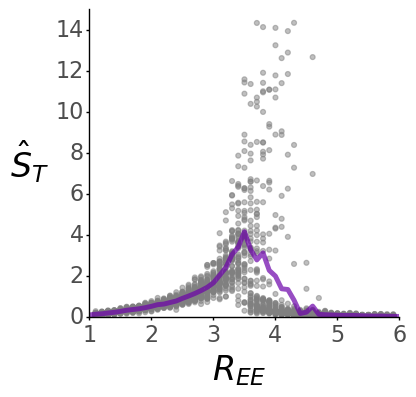

<ggplot: (97579758779)>

In [33]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high')) +
     geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +

    geom_line(alpha=0.7,size=2,color=colors[0]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,16,2),limits=(0,15),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/ST_0_indiv.png')
p.save('../figures/fluctuations/ST_0_indiv.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST_5_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 44 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/ST_5_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 44 rows co

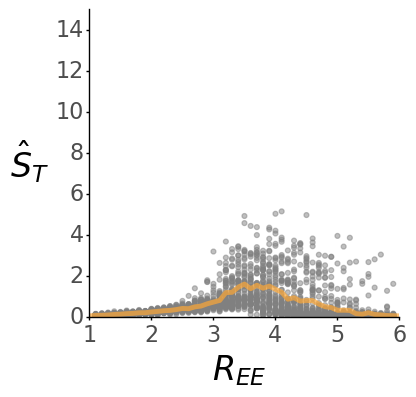

<ggplot: (97579705769)>

In [34]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['ST'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['ST']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.ST.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.ST.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='ST', ymin = 'ci_low',ymax = 'ci_high')) +
     geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +

    geom_line(alpha=0.7,size=2,color=colors[-1]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='$\hat{S}_{T}$',breaks=np.arange(0,16,2),limits=(0,15),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=0,vjust=0.5,hjust=1),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/ST_5_indiv.png')
p.save('../figures/fluctuations/ST_5_indiv.svg')

p

## 1/f Slope / Spectral Slope

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp.png


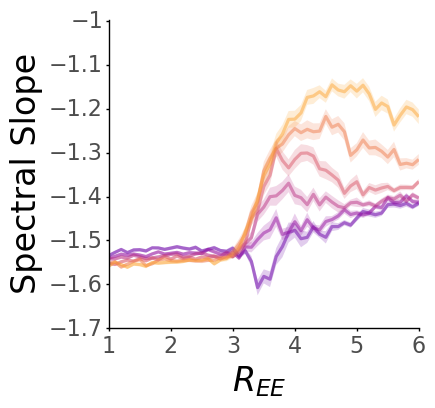

<ggplot: (197971161685)>

In [3]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['fexp'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['fexp']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.fexp.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.fexp.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)



p=(ggplot(df_temp,aes(x='Ree',y='fexp', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Spectral Slope',breaks=np.arange(-1.7,-0.9,0.1),limits=(-1.7,-0.999),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(legend_position='none',#(0.35,0.8),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/fexp.svg')
p.save('../figures/fluctuations/fexp.png')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp_0_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp_0_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.

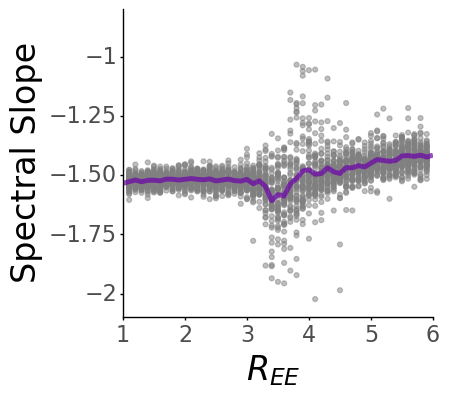

<ggplot: (197971894730)>

In [4]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['fexp'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['fexp']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.fexp.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.fexp.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='fexp', ymin = 'ci_low',ymax = 'ci_high')) +
     geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +

    geom_line(alpha=0.7,size=2,color=colors[0]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Spectral Slope',breaks=np.arange(-3,-0,0.25),limits=(-2.1,-0.8),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/fexp_0_indiv.png')
p.save('../figures/fluctuations/fexp_0_indiv.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp_5_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/fexp_5_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.

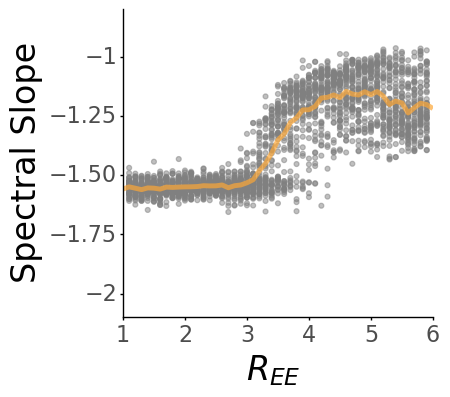

<ggplot: (197971805645)>

In [5]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['fexp'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['fexp']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.fexp.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.fexp.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='fexp', ymin = 'ci_low',ymax = 'ci_high')) +
     geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +

    geom_line(alpha=0.7,size=2,color=colors[-1]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Spectral Slope',breaks=np.arange(-3,-0,0.25),limits=(-2.1,-0.8),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/fexp_5_indiv.png')
p.save('../figures/fluctuations/fexp_5_indiv.svg')

p

## Autocorrelation Timescales

In [13]:
df.head()

,Ree,Network,Ksyn,CV,ST,fexp,taus
0,1.0,1,0.0,1.771592,0.056322,-1.516639,0.662532
1,1.0,1,0.1,1.916009,0.110184,-1.590358,71.925501
2,1.0,1,0.2,1.959004,0.091148,-1.566909,26.752396
3,1.0,1,0.3,2.019925,0.038483,-1.495061,155.362781
4,1.0,1,0.4,2.083849,0.109364,-1.606667,43.836837


C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/tau.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/tau.png


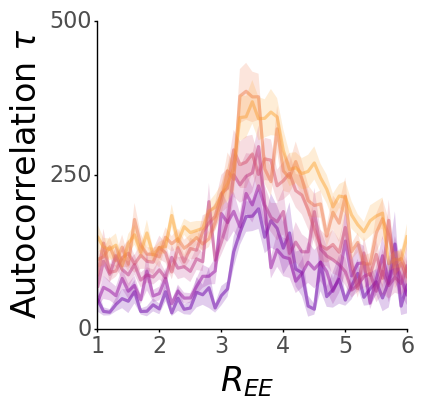

<ggplot: (96588913942)>

In [14]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['taus'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['taus']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.taus.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.taus.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)



p=(ggplot(df_temp,aes(x='Ree',y='taus', ymin = 'ci_low',ymax = 'ci_high',color='Ksyn',fill='Ksyn')) +
    geom_line(alpha=0.5,size=1.3) + 
    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Autocorrelation $\\tau$',breaks=np.arange(0,1200,250),limits=(0,500),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   guides(color=guide_legend(ncol=2))+
   theme(legend_position='none',#(0.35,0.8),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/tau.svg')
p.save('../figures/fluctuations/tau.png')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/taus_0_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1194 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/taus_0_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1194 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1194 rows containing missing values.


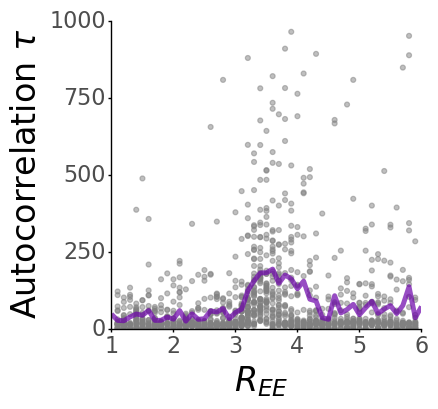

<ggplot: (97584010572)>

In [39]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['taus'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['taus']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.taus.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.taus.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.0'])]

df_all = df[df.Ksyn.isin(['0.0']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='taus', ymin = 'ci_low',ymax = 'ci_high')) +
 geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[0]) +

    geom_line(alpha=0.7,size=2,color=colors[0]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Autocorrelation $\\tau$',breaks=np.arange(0,1200,250),limits=(0,1000),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position='none',#(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/taus_0_indiv.png')
p.save('../figures/fluctuations/taus_0_indiv.svg')

p

C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/taus_5_indiv.png
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 282 rows containing missing values.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../figures/fluctuations/taus_5_indiv.svg
C:\Users\j_gav\anaconda3\envs\pymer4\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 282 r

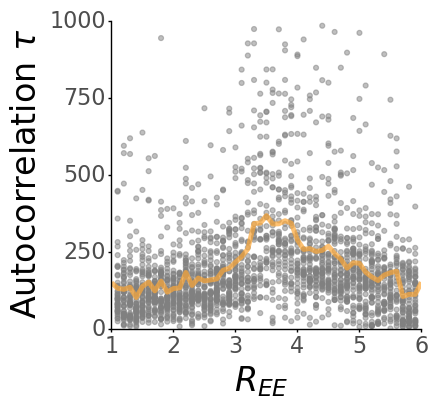

<ggplot: (97584063287)>

In [40]:
df_temp = df.groupby(['Ree','Ksyn'],as_index=False).mean()
df_temp2 = df.groupby(['Ree','Ksyn'],as_index=False)['taus'].sem()
# df_temp['ST_sem'] = df.groupby(['Ree','Ksyn'],as_index=False)['CV'].sem()
df_temp['sem'] = df_temp2['taus']

df_temp['Ksyn'] = df_temp.Ksyn.values.astype('str')

df_temp['ci_high'] = df_temp.taus.values + df_temp['sem'].values
df_temp['ci_low'] = df_temp.taus.values - df_temp['sem'].values

colormap = plt.cm.plasma #nipy_spectral, Set1,Paired   
colors = [np.array(colormap(i)) for i in np.linspace(0.2, 0.8,len(df.Ksyn.unique()))]

for ii in range(len(colors)):
    r,g,b = np.round(colors[ii][0:3]*256).astype('int')
    colors[ii] = '#{:02x}{:02x}{:02x}'.format(r,g,b)

df_temp = df_temp[df_temp.Ksyn.isin(['0.5'])]

df_all = df[df.Ksyn.isin(['0.5']) & df.Network.between(0,51)].copy()

df_all['ci_high'] = np.nan
df_all['ci_low'] = np.nan


p=(ggplot(df_temp,aes(x='Ree',y='taus', ymin = 'ci_low',ymax = 'ci_high')) +
    geom_point(aes(group='Network'),data=df_all[df_all.Ree.between(1.05,5.95)],color='gray',alpha=0.5)+
#     geom_ribbon(alpha=0.2,color='none',show_legend=False,fill=colors[-1]) +

    geom_line(alpha=0.7,size=2,color=colors[-1]) + 

#    geom_ribbon(alpha=0.2,color='none',show_legend=False) +
    scale_x_continuous(name='$R_{EE}$',expand = (0,0)) +
   scale_y_continuous(name='Autocorrelation $\\tau$',breaks=np.arange(0,1200,250),limits=(0,1000),expand = (0.0,0.0)) +
   scale_color_manual(name='% Slow Synapses',
                      breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                        labels = ['0%','10%','20%','30%','40%','50%'],
                      values=colors)+
   scale_fill_manual(breaks = ['0.0','0.1','0.2','0.3','0.4','0.5'],
                     values=colors) +
 theme_classic() +
   theme(legend_position=(0.35,0.7),
        legend_title = element_text(size=16),
         legend_background = element_blank(),
         legend_text = element_text(size=14),
         axis_text = element_text(size=16),
       axis_ticks_length = 2,
       axis_title = element_text(size=24),
         axis_title_y = element_text(size=24,angle=90),
        figure_size = (4,4)) 
#    geom_vline(xintercept=0,linetype='--',color='black') + 
)

p.save('../figures/fluctuations/taus_5_indiv.png')
p.save('../figures/fluctuations/taus_5_indiv.svg')

p